# Churn

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.graph_objs as go
# command for work offline
plotly.offline.init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('/home/wafa/Bureau/telco-customer-churn/Telco-Customer-Churn.csv', na_values = ' ')
data.head(n=2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [10]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [3]:
data.TotalCharges.fillna(value = data.tenure *  data.MonthlyCharges, inplace = True)

Text(0.5,1,'Relationship between loyalty months and total revenue')

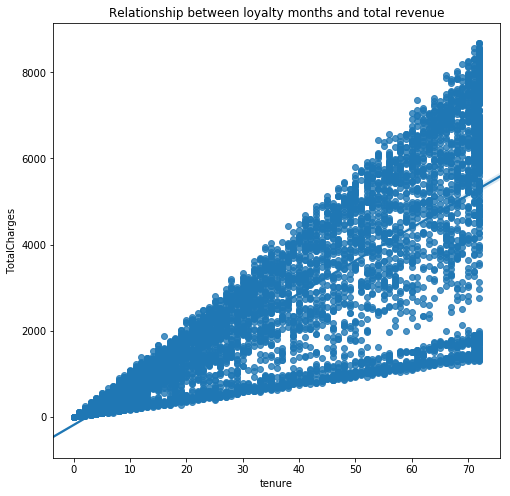

In [72]:
numerics = data[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']]

plt.figure(figsize = (8,8))

sns.regplot(x = 'tenure', y = 'TotalCharges', data = numerics)

plt.title('Relationship between loyalty months and total revenue')


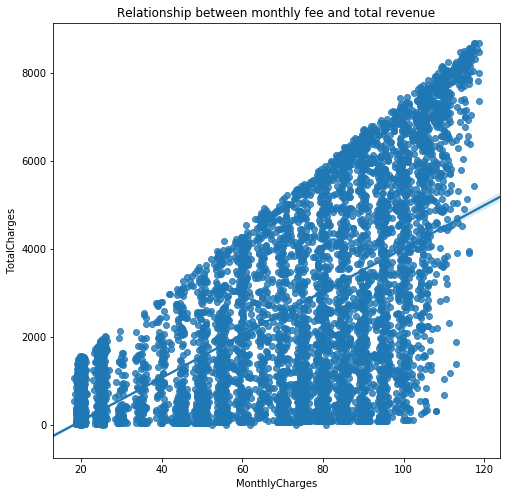

In [73]:
plt.figure(figsize = (8,8))
plt.title('Relationship between monthly fee and total revenue')
ax = sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = numerics)

Text(0.5,1,'Box Plot of Total Payments X Months of Loyalty')

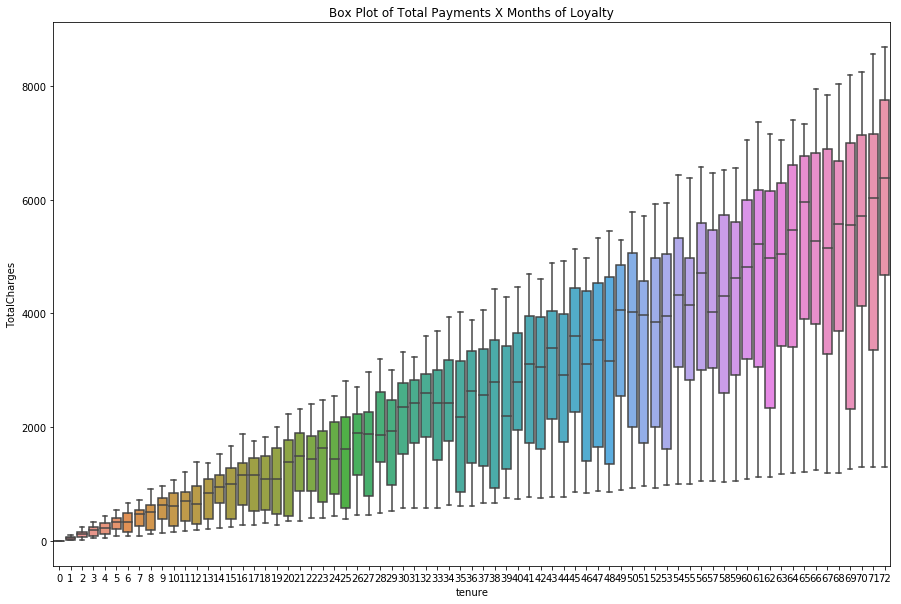

In [76]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'tenure', y = 'TotalCharges', data = data)
plt.title('Box Plot of Total Payments X Months of Loyalty')


In [77]:


data.describe(include = 'object')



,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,5
top,1122-YJBCS,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Tenure_0-12
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,2186


Quickly, in this picture we can already observe:

-     Most customers are not Senior;
-     The most popular internet service is fiber optics;
-     Most customers prefer not to receive printed accounts;
-     The most popular form of payment is the electronic payment



In [317]:
pd.crosstab(data.Churn, data.SeniorCitizen,
            margins = True)

SeniorCitizen,0,1,All
Churn,,,
0,4508,666,5174
1,1393,476,1869
All,5901,1142,7043


In [81]:

print('The percentage of elderly people who left the company: {}%'.format(476/1142*100))
print('The non-elderly population is: {}%'.format(1393/5901*100)) 

The percentage of elderly people who left the company: 41.68126094570928%
The non-elderly population is: 23.606168446026096%


Text(0.5,1,'Total Revenue by Seniors and Non-Seniors')

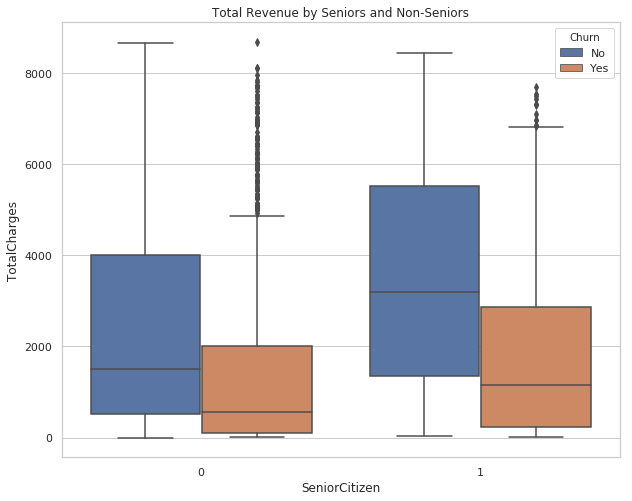

In [83]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = data.SeniorCitizen, y = data.TotalCharges, hue = data.Churn)

plt.title('Total Revenue by Seniors and Non-Seniors')


In [133]:
data.SeniorCitizen.value_counts(normalize = True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Based on the above comparisons:
-------------------------------------------------

Although they represent only 16% of clients, the elderly spend more in the company: It has a monthly average higher, leave more revenue and has a higher fidelity average. However, as we have seen, it has a much higher rate of evasion than the young public. The graphic makes this even clearer.

These numbers make sense. Older people spend more time at home, because they are retired or taking lighter lives, so they consume more television, which leads them to sign more complete and consequently more expensive packages.

#### Labelisation

In [4]:
from sklearn import preprocessing


def labelisation(data):
    # Create a label encoder object
    le = preprocessing.LabelEncoder()
    le_count = 0

    for col in data:
        if data[col].dtype == 'object':
            if len(list(data[col].unique())) <= 2:
                le.fit(data[col])
                # Transform both training
                data[col] = le.transform(data[col])

                # Keep track of how many columns were label encoded
                le_count += 1
    print('%d columns were label encoded.' % le_count)

## Data Visu

### There is no behavior difference between women and men.

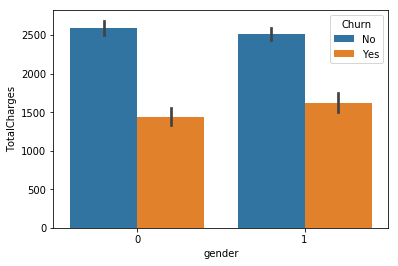

In [47]:
ax = sns.barplot(x="gender", y="TotalCharges", hue=y, data=X)

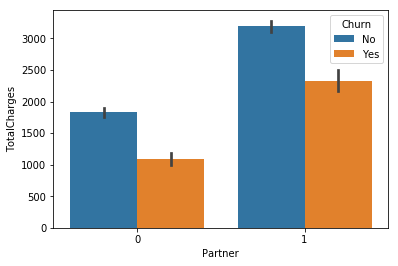

In [48]:
ax1 = sns.barplot(x="Partner", y="TotalCharges",hue=y, data=X)


#### Theres is great diference between people with partners and without it. People with partner(married ones) spent much more money in the company and stay much more time. That may be cause they has children and has more complete packs.


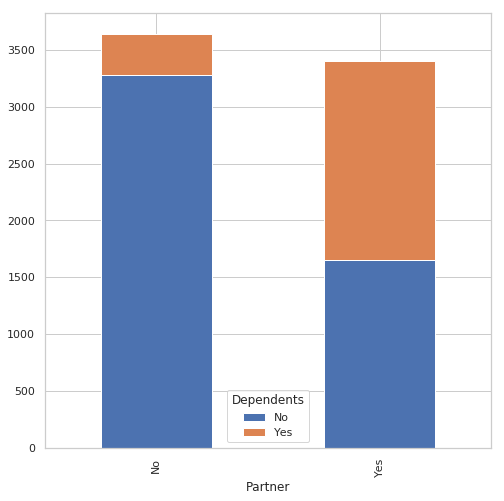

In [86]:
pd.crosstab(data.Partner, data.Dependents).plot(kind = 'bar', stacked = True, figsize = (8,8))

In [5]:
## Here i forked some code from another Kernel
data.drop(['customerID'], axis = 1, inplace = True)

In [6]:
data.head(n=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [7]:
# adjusting the column Multiple Lines
data.MultipleLines = data.MultipleLines.replace(to_replace= 'No phone service', value = 'No')
data.MultipleLines = data.MultipleLines.replace(to_replace= ['Yes', 'No'], value = [1,0])
data.MultipleLines.value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [8]:
#data.info()
# adjusting the column Multiple Lines
data['OnlineSecurity'] = data['OnlineSecurity'].replace(to_replace= 'No internet service', value = 'No')
data['OnlineSecurity'] = data['OnlineSecurity'].replace(to_replace= ['Yes', 'No'], value = [1,0])
data['OnlineSecurity'].value_counts()


0    5024
1    2019
Name: OnlineSecurity, dtype: int64

In [9]:
data['OnlineBackup'] = data['OnlineBackup'].replace(to_replace= 'No internet service', value = 'No')
data['OnlineBackup'] = data['OnlineBackup'].replace(to_replace= ['Yes', 'No'], value = [1,0])
data['OnlineBackup'].value_counts()

0    4614
1    2429
Name: OnlineBackup, dtype: int64

In [10]:
data['DeviceProtection'] = data['DeviceProtection'].replace(to_replace= 'No internet service', value = 'No')
data['DeviceProtection'] = data['DeviceProtection'].replace(to_replace= ['Yes', 'No'], value = [1,0])
data['DeviceProtection'].value_counts()

0    4621
1    2422
Name: DeviceProtection, dtype: int64

In [11]:
data['TechSupport'] = data['TechSupport'].replace(to_replace= 'No internet service', value = 'No')
data['TechSupport'] = data['TechSupport'].replace(to_replace= ['Yes', 'No'], value = [1,0])
data['TechSupport'].value_counts()   
      

0    4999
1    2044
Name: TechSupport, dtype: int64

In [12]:
data['StreamingTV'] = data['StreamingTV'].replace(to_replace= 'No internet service', value = 'No')
data['StreamingTV'] = data['StreamingTV'].replace(to_replace= ['Yes', 'No'], value = [1,0])
data['StreamingTV'].value_counts()     

0    4336
1    2707
Name: StreamingTV, dtype: int64

In [13]:
data['StreamingMovies'] = data['StreamingMovies'].replace(to_replace= 'No internet service', value = 'No')
data['StreamingMovies'] = data['StreamingMovies'].replace(to_replace= ['Yes', 'No'], value = [1,0])
data['StreamingMovies'].value_counts()

0    4311
1    2732
Name: StreamingMovies, dtype: int64

In [14]:
labelisation(data)
df = data
df.info()

6 columns were label encoded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(15), object(3)
memory usage: 1

In [15]:
df_dummies = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'], drop_first = True)

In [16]:
X = df_dummies.drop(labels=['Churn'],axis=1).copy()
y = df_dummies['Churn']

In [17]:
X.head(n=2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

X = scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)


/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/home/wafa/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Make the model with the specified regularization parameter
log_reg = LogisticRegression()

# Train on the training data
log_reg.fit(X_train, y_train)

# Make predictions
# Make sure to select the second column only
y_pred = log_reg.predict(X_val)

score = f1_score(y_val, y_pred)
score

/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.5953757225433525

In [21]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

predictions = clf.predict(X_val)

sc = f1_score(y_val, predictions)
sc

0.5133689839572193

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predictions = rfc.predict(X_val)
sce = f1_score(y_val, rfc_predictions)
sce

/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



0.49838187702265374

In [304]:
!pip install xgboost

You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from xgboost import XGBClassifier
# fit model no training data
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)
sce = f1_score(y_val, y_pred)
sce

0.6006006006006006

In [307]:
# A parameter grid for XGBoost
params = {
        'subsample': [0.2, 0.4, 0.5, 0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 9, 10],
    'n_estimators': [5, 10, 20, 30, 50], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'reg_alpha':[0, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2],
    'reg_lambda':[0, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2]
        }

In [313]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV


folds = 20
param_comb = 10

skf = StratifiedKFold(n_splits=5, shuffle = False, random_state = 22)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=500, scoring='f1', n_jobs=2, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go

random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_val)
predictions = [round(value) for value in y_pred]
random_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.0s
[Parallel(n_jobs=2)]: Done 140 tasks      | elapsed:   32.3s
[Parallel(n_jobs=2)]: Done 337 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 561 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 849 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 1201 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 1617 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 2097 tasks      | elapsed:  6.0min
[Parallel(n_jobs=2)]: Done 2500 out of 2500 | elapsed:  7.3min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0001, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0.5, reg_lambda=0.4, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.2)

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [25]:
xgb.fit(X_res, y_res)

y_pred = xgb.predict(X_val)
sce = f1_score(y_val, y_pred)
sce

0.6326086956521739

In [28]:
clf.fit(X_res, y_res)
predictions = clf.predict(X_val)

sc = f1_score(y_val, predictions)
sc

0.4942675159235668

In [29]:
rfc.fit(X_res,y_res)
rfc_predictions = rfc.predict(X_val)
sce = f1_score(y_val, rfc_predictions)
sce

0.5391061452513966